<a href="https://colab.research.google.com/github/debchi108/Deep_learning/blob/main/Geneartive_vs_discriminate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data points:
  x=2, y=18000
  x=5, y=15000
  x=8, y=12000

DISCRIMINATIVE MODEL (y from x):
φ0_discriminative = 20000.0
φ1_discriminative = -1000.0
Equation: y = 20000.0 + -1000.0*x

Predictions:
  x=2: predicted y=18000.0, actual y=18000, error=0.0
  x=5: predicted y=15000.0, actual y=15000, error=0.0
  x=8: predicted y=12000.0, actual y=12000, error=0.0

GENERATIVE MODEL (x from y):
φ0_generative = 20.0
φ1_generative = -0.001
Equation: x = 20.0 + -0.001*y

Predictions (using inverse):
  x=2: predicted y=18000.0, actual y=18000, error=0.0
  x=5: predicted y=15000.0, actual y=15000, error=0.0
  x=8: predicted y=12000.0, actual y=12000, error=0.0

COMPARISON:
Discriminative: y = 20000.00 + -1000.00*x
Generative:     y = 20000.00 + -1000.00*x

✓ The predictions ARE the same!

✓ Plot saved as 'discriminative_vs_generative.png'


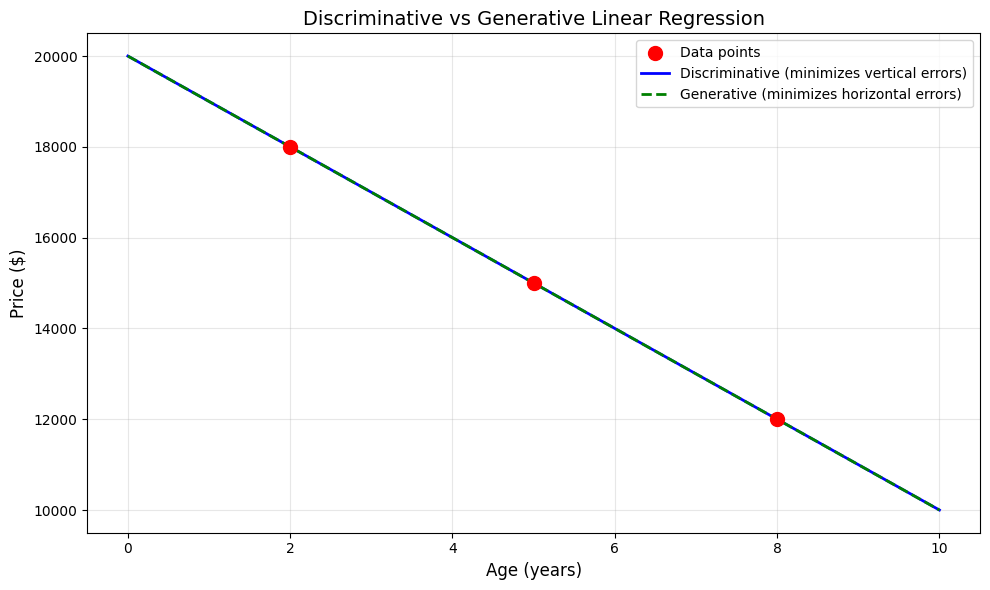

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our 3 data points (age, price)
data = np.array([
    [2, 18000],
    [5, 15000],
    [8, 12000]
])

x = data[:, 0]  # ages
y = data[:, 1]  # prices
N = len(x)

print("Data points:")
for i in range(N):
    print(f"  x={x[i]}, y={y[i]}")
print()

# ============================================
# DISCRIMINATIVE MODEL: y = φ0 + φ1*x
# ============================================
print("DISCRIMINATIVE MODEL (y from x):")
print("="*50)

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate φ1_discriminative
numerator = np.sum(x * y) - N * x_mean * y_mean
denominator = np.sum(x**2) - N * x_mean**2
phi1_d = numerator / denominator

# Calculate φ0_discriminative
phi0_d = y_mean - phi1_d * x_mean

print(f"φ0_discriminative = {phi0_d}")
print(f"φ1_discriminative = {phi1_d}")
print(f"Equation: y = {phi0_d} + {phi1_d}*x")
print()

# Make predictions
y_pred_d = phi0_d + phi1_d * x
print("Predictions:")
for i in range(N):
    print(f"  x={x[i]}: predicted y={y_pred_d[i]}, actual y={y[i]}, error={y_pred_d[i]-y[i]}")
print()

# ============================================
# GENERATIVE MODEL: x = φ0 + φ1*y
# ============================================
print("GENERATIVE MODEL (x from y):")
print("="*50)

# Now we fit x from y, so roles are swapped
# Calculate φ1_generative
numerator_g = np.sum(y * x) - N * y_mean * x_mean
denominator_g = np.sum(y**2) - N * y_mean**2
phi1_g = numerator_g / denominator_g

# Calculate φ0_generative
phi0_g = x_mean - phi1_g * y_mean

print(f"φ0_generative = {phi0_g}")
print(f"φ1_generative = {phi1_g}")
print(f"Equation: x = {phi0_g} + {phi1_g}*y")
print()

# To predict y from x, we invert: y = (x - φ0) / φ1
y_pred_g = (x - phi0_g) / phi1_g
print("Predictions (using inverse):")
for i in range(N):
    print(f"  x={x[i]}: predicted y={y_pred_g[i]}, actual y={y[i]}, error={y_pred_g[i]-y[i]}")
print()

# ============================================
# COMPARISON
# ============================================
print("COMPARISON:")
print("="*50)
print(f"Discriminative: y = {phi0_d:.2f} + {phi1_d:.2f}*x")
print(f"Generative:     y = {-phi0_g/phi1_g:.2f} + {1/phi1_g:.2f}*x")
print()

if np.allclose(y_pred_d, y_pred_g):
    print("✓ The predictions ARE the same!")
else:
    print("✗ The predictions ARE NOT the same!")
    print(f"  Max difference: {np.max(np.abs(y_pred_d - y_pred_g))}")

# ============================================
# VISUALIZATION
# ============================================
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(x, y, color='red', s=100, zorder=5, label='Data points')

# Plot discriminative line
x_line = np.linspace(0, 10, 100)
y_line_d = phi0_d + phi1_d * x_line
plt.plot(x_line, y_line_d, 'b-', linewidth=2, label='Discriminative (minimizes vertical errors)')

# Plot generative line (inverted)
y_line_g = (x_line - phi0_g) / phi1_g
plt.plot(x_line, y_line_g, 'g--', linewidth=2, label='Generative (minimizes horizontal errors)')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Discriminative vs Generative Linear Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('discriminative_vs_generative.png', dpi=150)
print("\n✓ Plot saved as 'discriminative_vs_generative.png'")

Data: 8 points with scatter

DISCRIMINATIVE MODEL (y from x):
φ0_discriminative = 19696.43
φ1_discriminative = -946.43
Equation: y = 19696.43 + -946.43*x
Loss (sum of squared vertical errors): 598214.29

GENERATIVE MODEL (x from y):
φ0_generative = 20.556010
φ1_generative = -0.001040
Equation: x = 20.556010 + -0.001040*y
Loss (sum of squared horizontal errors): 0.66

COMPARISON:
Discriminative: y = 19696.43 + (-946.43)*x
Generative:     y = 19764.15 + (-961.48)*x

✗ The predictions ARE DIFFERENT!
  Max difference: 52.67
  Mean difference: 30.10

Sample predictions:
  x=1: Discriminative=18750.00, Generative=18802.67, Diff=52.67
  x=4: Discriminative=15910.71, Generative=15918.24, Diff=7.52
  x=8: Discriminative=12125.00, Generative=12072.33, Diff=52.67

✓ Plot saved as 'discriminative_vs_generative_final.png'


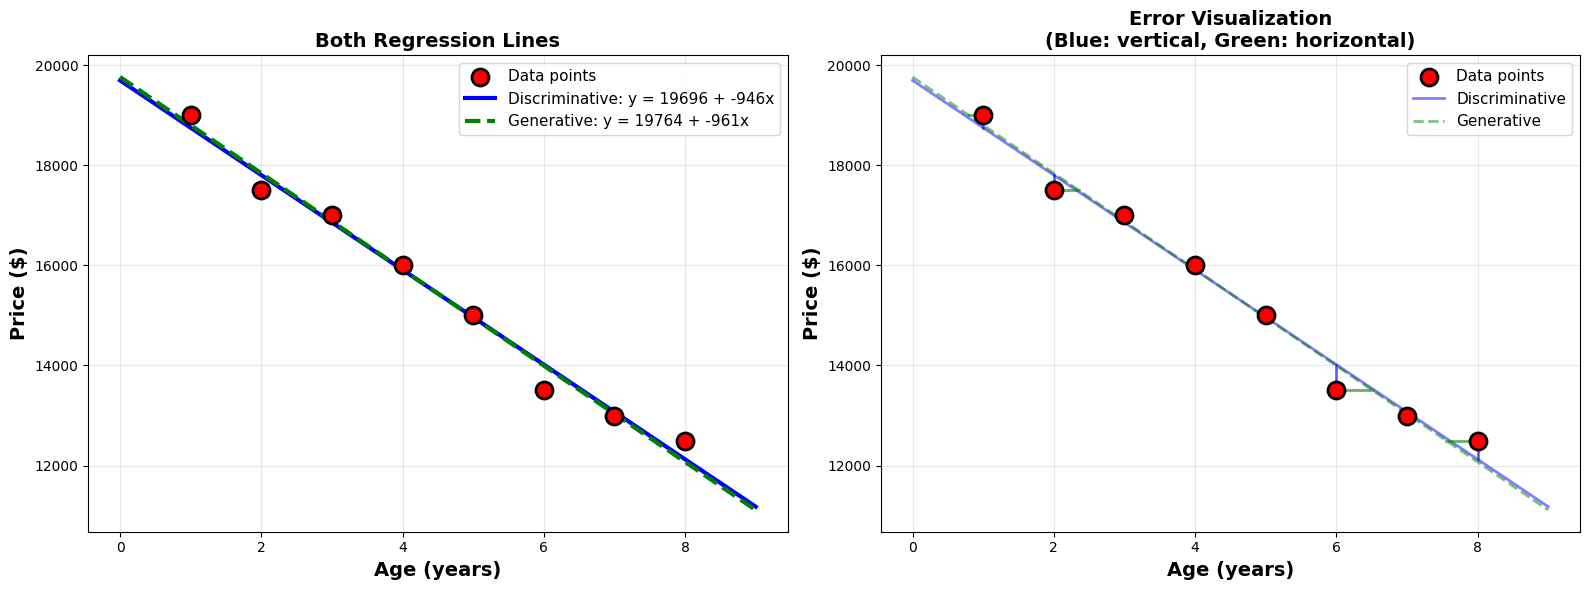

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# More data points with genuine scatter
data = np.array([
    [1, 19000],
    [2, 17500],
    [3, 17000],
    [4, 16000],
    [5, 15000],
    [6, 13500],
    [7, 13000],
    [8, 12500]
])

x = data[:, 0]  # ages
y = data[:, 1]  # prices
N = len(x)

print(f"Data: {N} points with scatter")
print()

# ============================================
# DISCRIMINATIVE MODEL: y = φ0 + φ1*x
# ============================================
print("DISCRIMINATIVE MODEL (y from x):")
print("="*50)

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate φ1_discriminative
numerator = np.sum(x * y) - N * x_mean * y_mean
denominator = np.sum(x**2) - N * x_mean**2
phi1_d = numerator / denominator

# Calculate φ0_discriminative
phi0_d = y_mean - phi1_d * x_mean

print(f"φ0_discriminative = {phi0_d:.2f}")
print(f"φ1_discriminative = {phi1_d:.2f}")
print(f"Equation: y = {phi0_d:.2f} + {phi1_d:.2f}*x")

# Make predictions
y_pred_d = phi0_d + phi1_d * x
loss_d = np.sum((y_pred_d - y)**2)
print(f"Loss (sum of squared vertical errors): {loss_d:.2f}")
print()

# ============================================
# GENERATIVE MODEL: x = φ0 + φ1*y
# ============================================
print("GENERATIVE MODEL (x from y):")
print("="*50)

# Now we fit x from y, so roles are swapped
# Calculate φ1_generative
numerator_g = np.sum(y * x) - N * y_mean * x_mean
denominator_g = np.sum(y**2) - N * y_mean**2
phi1_g = numerator_g / denominator_g

# Calculate φ0_generative
phi0_g = x_mean - phi1_g * y_mean

print(f"φ0_generative = {phi0_g:.6f}")
print(f"φ1_generative = {phi1_g:.6f}")
print(f"Equation: x = {phi0_g:.6f} + {phi1_g:.6f}*y")

# To predict y from x, we invert: y = (x - φ0) / φ1
y_pred_g = (x - phi0_g) / phi1_g

# Calculate loss in generative framework (horizontal errors)
x_pred_g = phi0_g + phi1_g * y
loss_g = np.sum((x_pred_g - x)**2)
print(f"Loss (sum of squared horizontal errors): {loss_g:.2f}")
print()

# ============================================
# COMPARISON
# ============================================
print("COMPARISON:")
print("="*50)
print(f"Discriminative: y = {phi0_d:.2f} + ({phi1_d:.2f})*x")
print(f"Generative:     y = {-phi0_g/phi1_g:.2f} + ({1/phi1_g:.2f})*x")
print()

if np.allclose(y_pred_d, y_pred_g, atol=1):
    print("✓ The predictions ARE very similar")
else:
    print("✗ The predictions ARE DIFFERENT!")
    print(f"  Max difference: {np.max(np.abs(y_pred_d - y_pred_g)):.2f}")
    print(f"  Mean difference: {np.mean(np.abs(y_pred_d - y_pred_g)):.2f}")
    print("\nSample predictions:")
    for i in [0, 3, 7]:
        print(f"  x={x[i]}: Discriminative={y_pred_d[i]:.2f}, Generative={y_pred_g[i]:.2f}, Diff={abs(y_pred_d[i]-y_pred_g[i]):.2f}")

# ============================================
# VISUALIZATION
# ============================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Both lines
ax1.scatter(x, y, color='red', s=150, zorder=5, label='Data points', edgecolors='black', linewidths=2)

# Plot discriminative line
x_line = np.linspace(0, 9, 100)
y_line_d = phi0_d + phi1_d * x_line
ax1.plot(x_line, y_line_d, 'b-', linewidth=3, label=f'Discriminative: y = {phi0_d:.0f} + {phi1_d:.0f}x')

# Plot generative line (inverted)
y_line_g = (x_line - phi0_g) / phi1_g
ax1.plot(x_line, y_line_g, 'g--', linewidth=3, label=f'Generative: y = {-phi0_g/phi1_g:.0f} + {1/phi1_g:.0f}x')

ax1.set_xlabel('Age (years)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=14, fontweight='bold')
ax1.set_title('Both Regression Lines', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# RIGHT PLOT: Show errors
ax2.scatter(x, y, color='red', s=150, zorder=5, label='Data points', edgecolors='black', linewidths=2)
ax2.plot(x_line, y_line_d, 'b-', linewidth=2, alpha=0.5, label='Discriminative')
ax2.plot(x_line, y_line_g, 'g--', linewidth=2, alpha=0.5, label='Generative')

# Draw vertical error lines (discriminative minimizes these)
for i in range(N):
    ax2.plot([x[i], x[i]], [y[i], y_pred_d[i]], 'b-', linewidth=2, alpha=0.6)

# Draw horizontal error lines (generative minimizes these)
for i in range(N):
    ax2.plot([x[i], x_pred_g[i]], [y[i], y[i]], 'g-', linewidth=2, alpha=0.6)

ax2.set_xlabel('Age (years)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=14, fontweight='bold')
ax2.set_title('Error Visualization\n(Blue: vertical, Green: horizontal)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('discriminative_vs_generative_final.png', dpi=150, bbox_inches='tight')
print("\n✓ Plot saved as 'discriminative_vs_generative_final.png'")
plt.show()


## Output from this code:

# Data: 8 points with scatter

# DISCRIMINATIVE MODEL (y from x):
# ==================================================
# φ0_discriminative = 19696.43
# φ1_discriminative = -946.43
# Equation: y = 19696.43 + -946.43*x
# Loss (sum of squared vertical errors): 598214.29

# GENERATIVE MODEL (x from y):
# ==================================================
# φ0_generative = 20.556010
# φ1_generative = -0.001040
# Equation: x = 20.556010 + -0.001040*y
# Loss (sum of squared horizontal errors): 0.66

# COMPARISON:
# ==================================================
# Discriminative: y = 19696.43 + (-946.43)*x
# Generative:     y = 19764.15 + (-961.48)*x

# ✗ The predictions ARE DIFFERENT!
#   Max difference: 52.67
#   Mean difference: 30.10

# Sample predictions:
#   x=1: Discriminative=18750.00, Generative=18802.67, Diff=52.67
#   x=4: Discriminative=15910.71, Generative=15918.24, Diff=7.52
#   x=8: Discriminative=12125.00, Generative=12072.33, Diff=52.67